![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

### Stakeholders: small real estate company who advises families on selling their homes
### Pain points: 

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [160]:
# import relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
data = pd.read_csv('../../data/kc_house_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [9]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [106]:
# I'm focusing on specific house features
rel_cols = ['id','price','sqft_living','sqft_lot','sqft_above','sqft_basement',
            'floors','bedrooms','bathrooms']
rel_cols_log = ['id','price','sqft_living','sqft_lot','sqft_above']

In [73]:
datan = data[rel_cols]
datan

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms
0,7129300520,221900.0,1180,5650,1180,0.0,1.0,3,1.00
1,6414100192,538000.0,2570,7242,2170,400.0,2.0,3,2.25
2,5631500400,180000.0,770,10000,770,0.0,1.0,2,1.00
3,2487200875,604000.0,1960,5000,1050,910.0,1.0,4,3.00
4,1954400510,510000.0,1680,8080,1680,0.0,1.0,3,2.00
...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,1530,1131,1530,0.0,3.0,3,2.50
21593,6600060120,400000.0,2310,5813,2310,0.0,2.0,4,2.50
21594,1523300141,402101.0,1020,1350,1020,0.0,2.0,2,0.75
21595,291310100,400000.0,1600,2388,1600,0.0,2.0,3,2.50


In [74]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_basement  21597 non-null  object 
 6   floors         21597 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   bathrooms      21597 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.5+ MB


In [75]:
datan['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
248.0         1
2120.0        1
266.0         1
283.0         1
3260.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [76]:
datan.loc[datan['sqft_basement'] == '?','sqft_basement'] = np.nan

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [77]:
datan['sqft_basement'].value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
248.0         1
2120.0        1
266.0         1
283.0         1
3260.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [78]:
def tryfloat(x):
    try:
        return float(x)
    except:
        return x

In [79]:
datan['sqft_basement'] = datan['sqft_basement'].map(tryfloat)

<ipython-input-79-e3af73b1d868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datan['sqft_basement'] = datan['sqft_basement'].map(tryfloat)


In [80]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   sqft_living    21597 non-null  int64  
 3   sqft_lot       21597 non-null  int64  
 4   sqft_above     21597 non-null  int64  
 5   sqft_basement  21143 non-null  float64
 6   floors         21597 non-null  float64
 7   bedrooms       21597 non-null  int64  
 8   bathrooms      21597 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 1.5 MB


In [81]:
datan.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21143.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,2080.321850,1.509941e+04,1788.596842,291.851724,1.494096,3.373200,2.115826
std,2.876736e+09,3.673681e+05,918.106125,4.141264e+04,827.759761,442.498337,0.539683,0.926299,0.768984
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,1.000000,1.000000,0.500000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.000000,0.000000,1.000000,3.000000,1.750000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1560.000000,0.000000,1.500000,3.000000,2.250000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068500e+04,2210.000000,560.000000,2.000000,4.000000,2.500000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,3.500000,33.000000,8.000000


In [82]:
for col in datan.columns:
    print(f'\n{col}:\n')
    print(datan.sort_values(by=col,ascending=False).head(10))


id:

               id     price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
15937  9900000190  268950.0         1320      8100         880          440.0   
20963  9895000040  399900.0         1410      1005         900          510.0   
7614   9842300540  339000.0         1100      4128         720          380.0   
3257   9842300485  380000.0         1040      7372         840          200.0   
16723  9842300095  365000.0         1600      4168        1600            0.0   
11642  9842300036  415885.0         1310      4163        1310            0.0   
13015  9839301165  998500.0         1570      4400        1570            0.0   
4817   9839301060  650500.0         1740      4400        1740            0.0   
4675   9839301055  670000.0         1490      4400        1490            0.0   
1714   9839300875  800000.0         1700      4400        1700            0.0   

       floors  bedrooms  bathrooms  
15937     1.0         3       1.00  
20963     1.5         2     

33 bedrooms is pretty crazy and not highly correlated with a high price. I'll remove that one.

In [83]:
datan = datan[datan['bedrooms'] != 33]
datan.describe()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms
count,2.159600e+04,2.159600e+04,21596.000000,2.159600e+04,21596.000000,21142.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,2080.343165,1.509983e+04,1788.631506,291.838095,1.494119,3.371828,2.115843
std,2.876764e+09,3.673760e+05,918.122038,4.141355e+04,827.763251,442.504364,0.539685,0.904114,0.768998
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,0.000000,1.000000,1.000000,0.500000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.000000,0.000000,1.000000,3.000000,1.750000
50%,3.904930e+09,4.500000e+05,1910.000000,7.619000e+03,1560.000000,0.000000,1.500000,3.000000,2.250000
75%,7.308950e+09,6.450000e+05,2550.000000,1.068550e+04,2210.000000,560.000000,2.000000,4.000000,2.500000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,3.500000,11.000000,8.000000


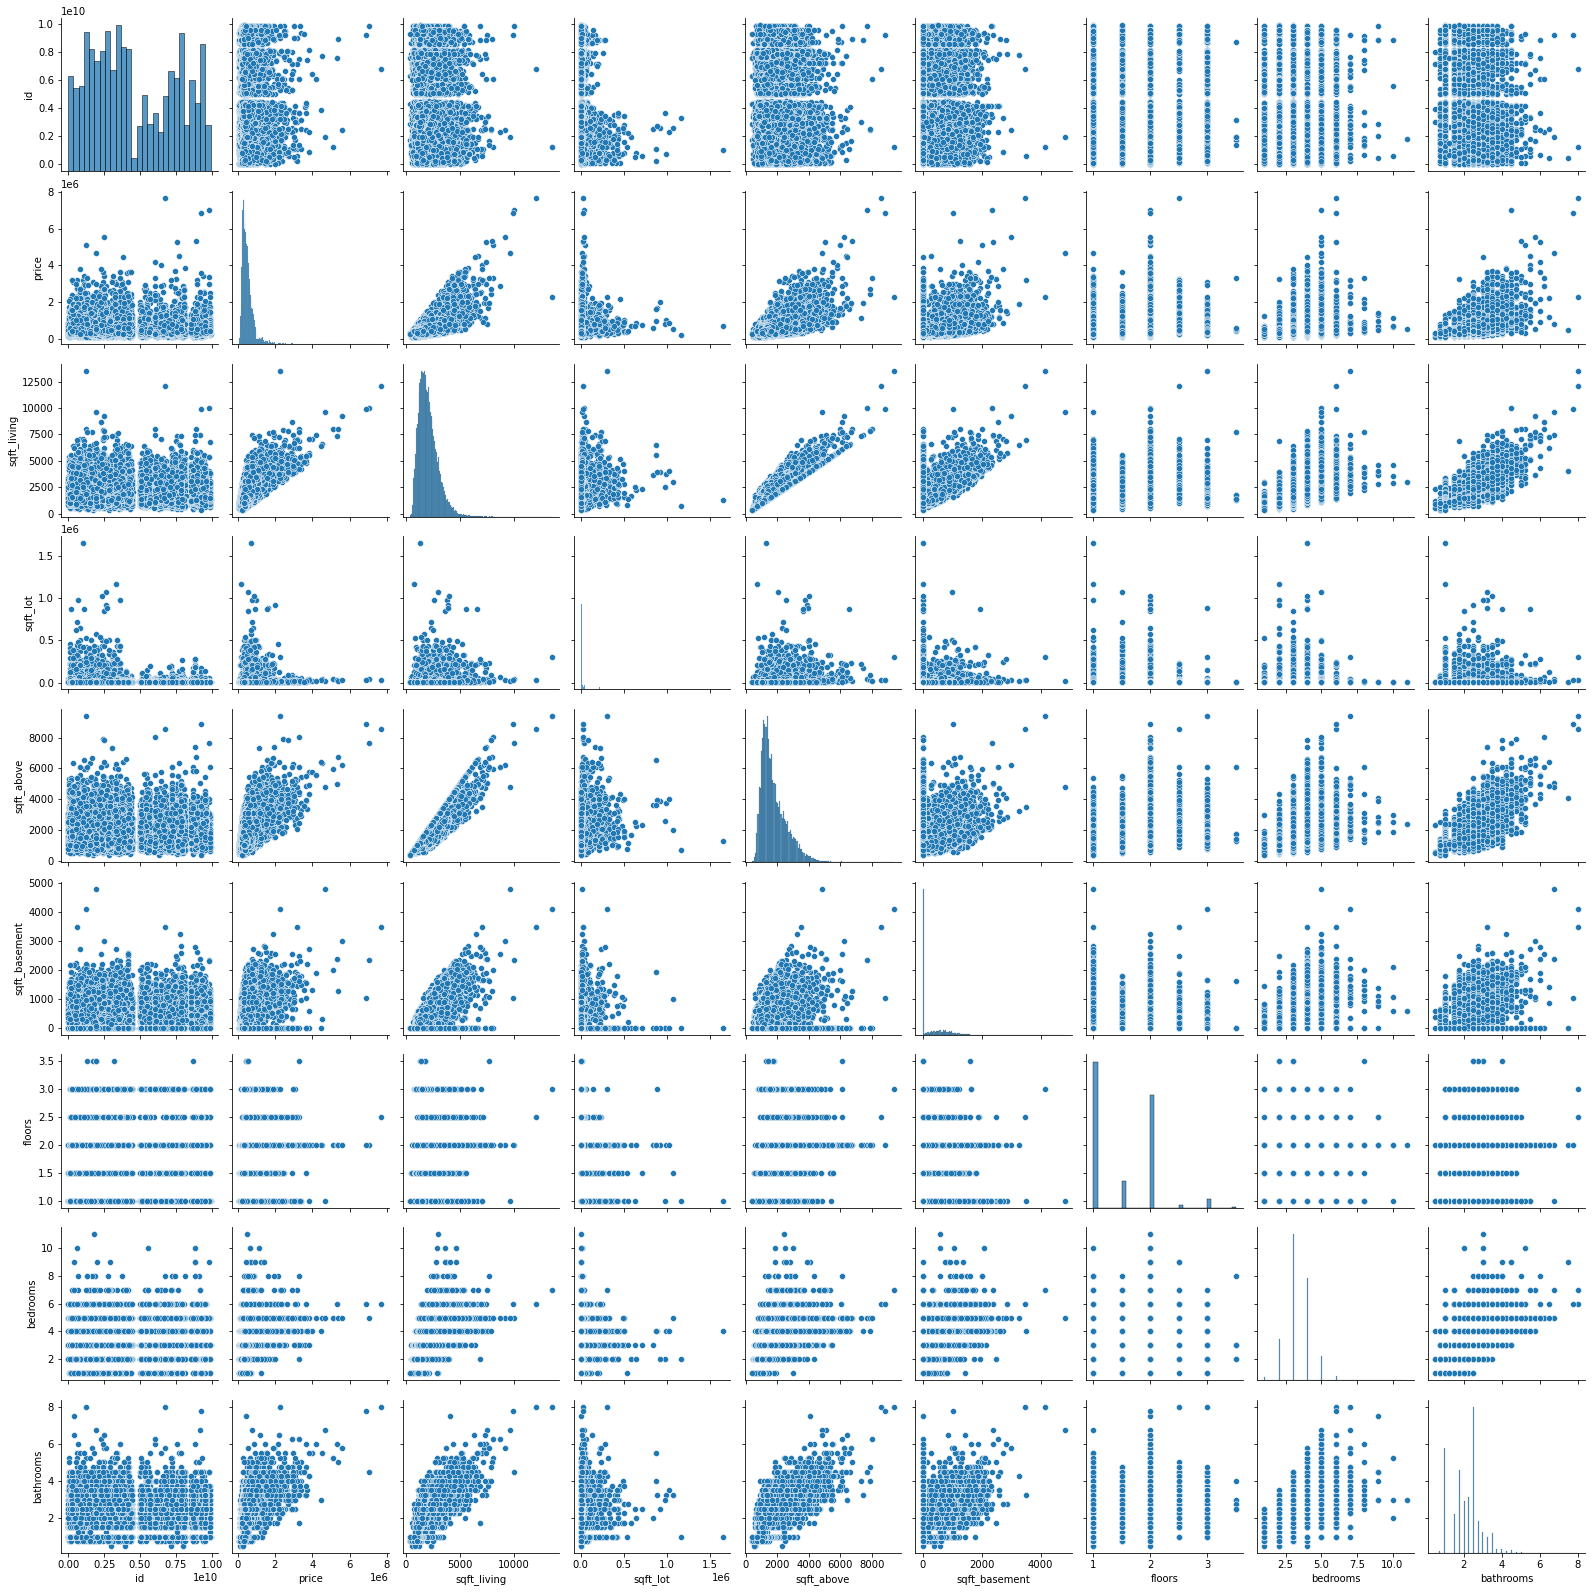

In [84]:
sns.pairplot(datan);

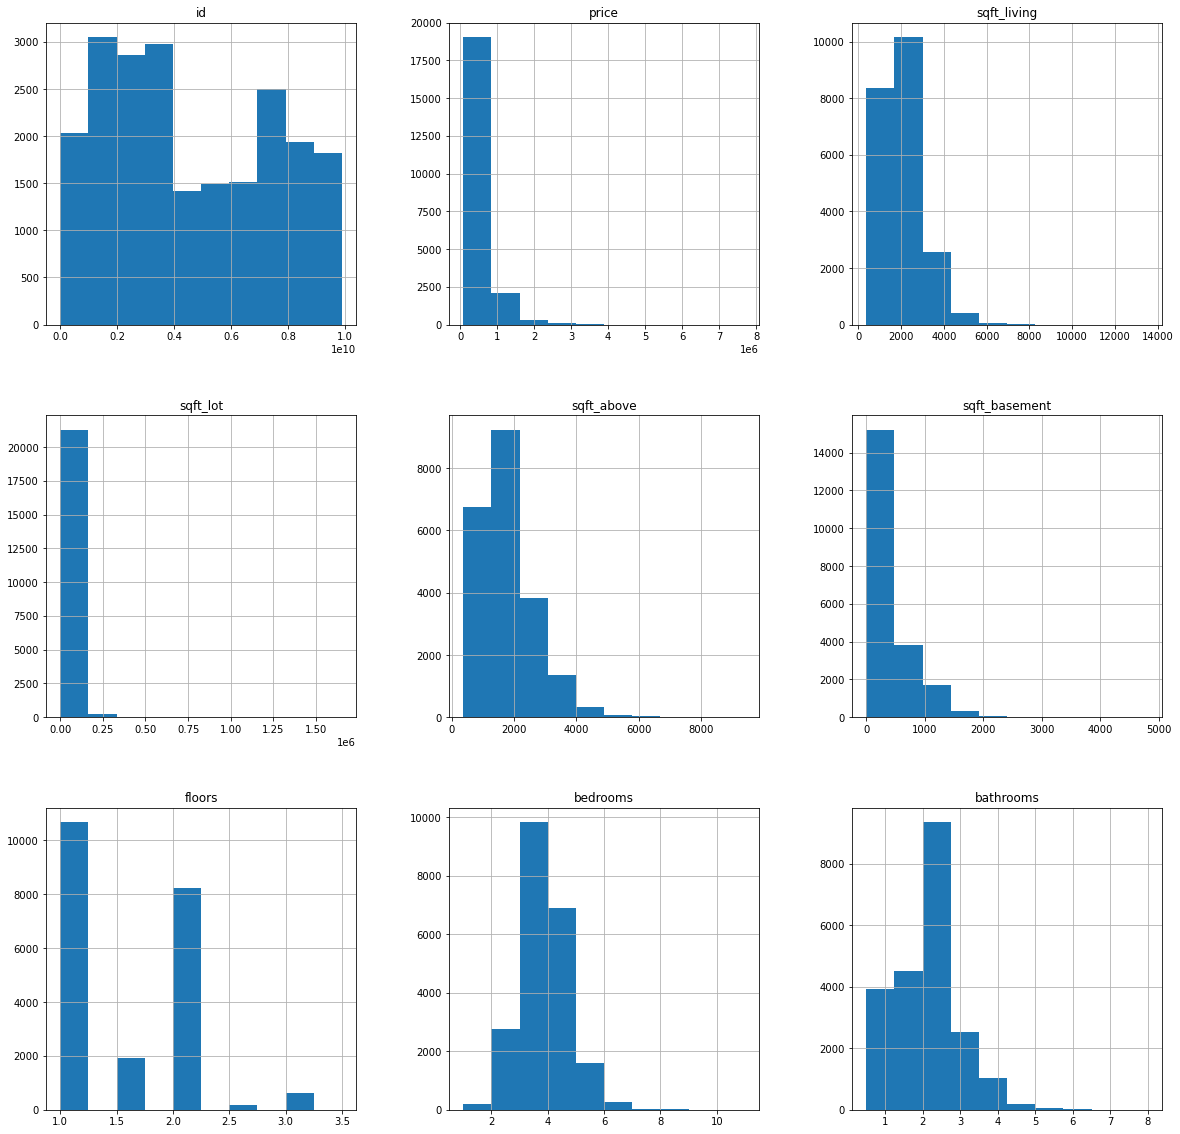

In [85]:
datan.hist(figsize=(20,20));

In [86]:
datan.corr()

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms
id,1.000000,-0.016763,-0.012258,-0.131920,-0.010831,-0.004525,0.018576,0.002328,0.005145
price,-0.016763,1.000000,0.701929,0.089879,0.605392,0.325003,0.256820,0.315961,0.525915
sqft_living,-0.012258,0.701929,1.000000,0.173449,0.876448,0.434598,0.353941,0.593178,0.755755
sqft_lot,-0.131920,0.089879,0.173449,1.000000,0.184134,0.015540,-0.004824,0.033602,0.088368
sqft_above,-0.010831,0.605392,0.876448,0.184134,1.000000,-0.052266,0.523970,0.492543,0.686664
sqft_basement,-0.004525,0.325003,0.434598,0.015540,-0.052266,1.000000,-0.245123,0.309298,0.282712
floors,0.018576,0.256820,0.353941,-0.004824,0.523970,-0.245123,1.000000,0.183707,0.502574
bedrooms,0.002328,0.315961,0.593178,0.033602,0.492543,0.309298,0.183707,1.000000,0.527870
bathrooms,0.005145,0.525915,0.755755,0.088368,0.686664,0.282712,0.502574,0.527870,1.000000


Lot of these features look like they could use some log processing. Let's try it with the whole thing to see what happens.

In [107]:
datanlog = pd.DataFrame()
for col in rel_cols_log:
    if col == 'id':
        datanlog[col] = datan[col]
        continue
    if col == 'sqft_basement':
        continue
    datanlog[f'{col}_log'] = datan[col].map(lambda x: np.log(x))

In [108]:
datanlog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21596 non-null  int64  
 1   price_log        21596 non-null  float64
 2   sqft_living_log  21596 non-null  float64
 3   sqft_lot_log     21596 non-null  float64
 4   sqft_above_log   21596 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1012.3 KB


In [109]:
datanlog.describe()

,id,price_log,sqft_living_log,sqft_lot_log,sqft_above_log
count,2.159600e+04,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,13.048196,7.550728,8.989818,7.395169
std,2.876764e+09,0.526562,0.424199,0.902097,0.427139
min,1.000102e+06,11.264464,5.913503,6.253829,5.913503
25%,2.123049e+09,12.682307,7.265430,8.525161,7.081709
50%,3.904930e+09,13.017003,7.554859,8.938400,7.352441
75%,7.308950e+09,13.377006,7.843849,9.276643,7.700748
max,9.900000e+09,15.856731,9.513404,14.317109,9.149528


In [110]:
datanlog.corr()

,id,price_log,sqft_living_log,sqft_lot_log,sqft_above_log
id,1.000000,-0.003730,-0.001878,-0.149814,-0.001626
price_log,-0.003730,1.000000,0.674820,0.138271,0.586062
sqft_living_log,-0.001878,0.674820,1.000000,0.325979,0.864986
sqft_lot_log,-0.149814,0.138271,0.325979,1.000000,0.318657
sqft_above_log,-0.001626,0.586062,0.864986,0.318657,1.000000


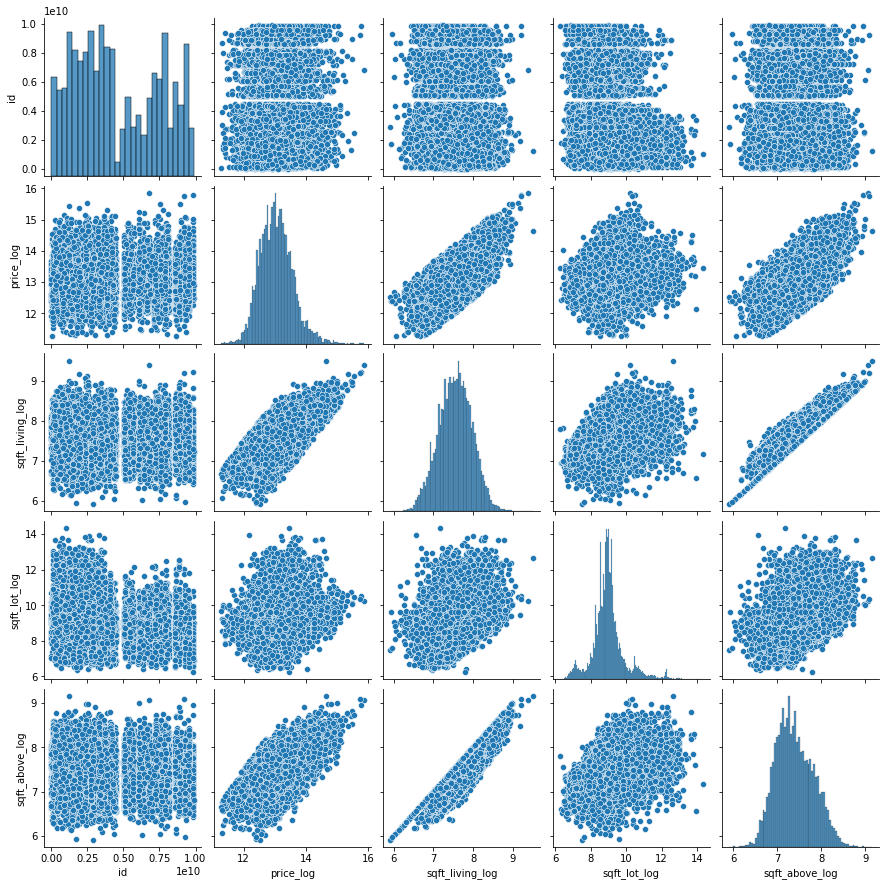

In [111]:
sns.pairplot(datanlog);

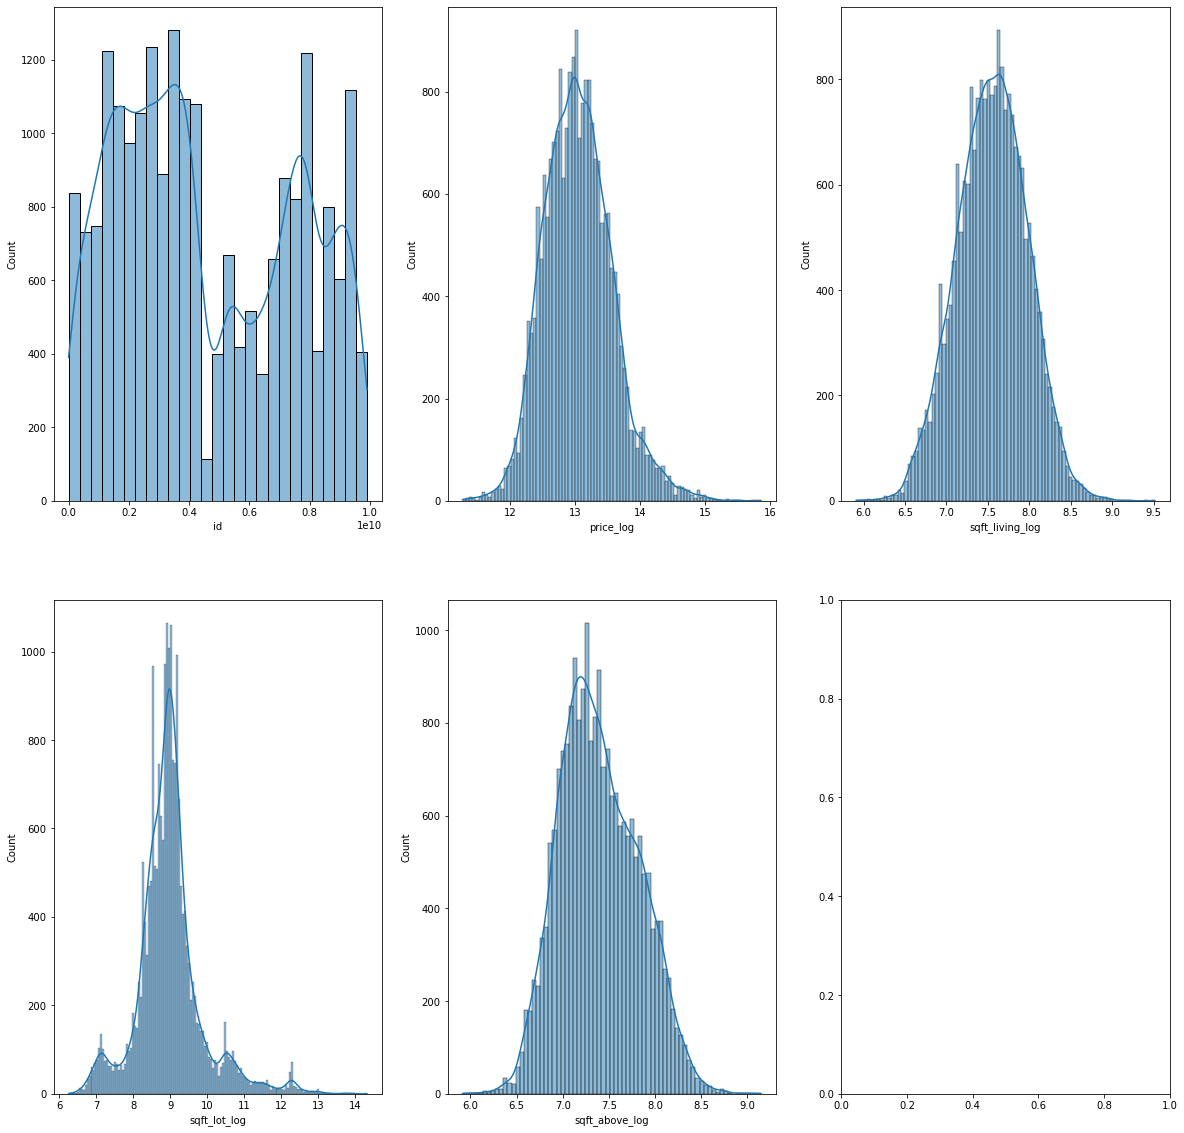

In [113]:
fix, axes = plt.subplots(2,3, figsize=(20,20))
for i, col in enumerate(datanlog.columns):
    sns.histplot(data=datanlog, x=col, kde=True, ax=axes[i//3,i%3]);

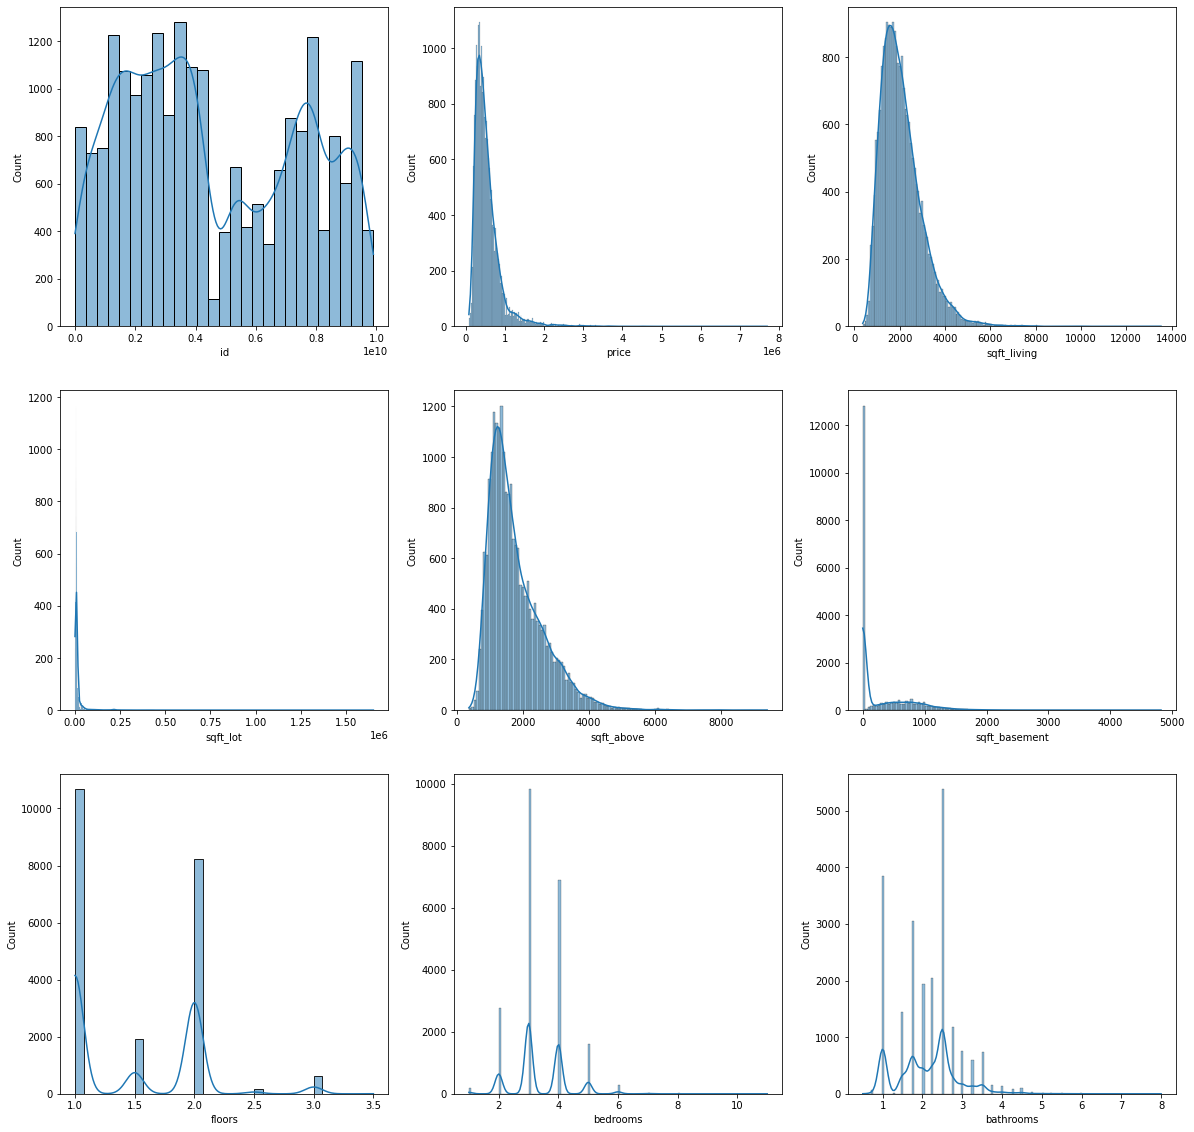

In [104]:
fix, axes = plt.subplots(3,3, figsize=(20,20))
for i, col in enumerate(datan.columns):
    sns.histplot(data=datan, x=col, kde=True, ax=axes[i//3,i%3]);

In [105]:
datanfeat = datan.drop(columns='price')
datanfeat.corr()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms
id,1.000000,-0.012258,-0.131920,-0.010831,-0.004525,0.018576,0.002328,0.005145
sqft_living,-0.012258,1.000000,0.173449,0.876448,0.434598,0.353941,0.593178,0.755755
sqft_lot,-0.131920,0.173449,1.000000,0.184134,0.015540,-0.004824,0.033602,0.088368
sqft_above,-0.010831,0.876448,0.184134,1.000000,-0.052266,0.523970,0.492543,0.686664
sqft_basement,-0.004525,0.434598,0.015540,-0.052266,1.000000,-0.245123,0.309298,0.282712
floors,0.018576,0.353941,-0.004824,0.523970,-0.245123,1.000000,0.183707,0.502574
bedrooms,0.002328,0.593178,0.033602,0.492543,0.309298,0.183707,1.000000,0.527870
bathrooms,0.005145,0.755755,0.088368,0.686664,0.282712,0.502574,0.527870,1.000000


In [114]:
datanlogfeat = datanlog.drop(columns='price_log')
datanlogfeat.corr()

,id,sqft_living_log,sqft_lot_log,sqft_above_log
id,1.000000,-0.001878,-0.149814,-0.001626
sqft_living_log,-0.001878,1.000000,0.325979,0.864986
sqft_lot_log,-0.149814,0.325979,1.000000,0.318657
sqft_above_log,-0.001626,0.864986,0.318657,1.000000


In [185]:
datantot = pd.merge(datan,datanlog,on='id')
datantot

,id,price,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,price_log,sqft_living_log,sqft_lot_log,sqft_above_log
0,7129300520,221900.0,1180,5650,1180,0.0,1.0,3,1.00,12.309982,7.073270,8.639411,7.073270
1,6414100192,538000.0,2570,7242,2170,400.0,2.0,3,2.25,13.195614,7.851661,8.887653,7.682482
2,5631500400,180000.0,770,10000,770,0.0,1.0,2,1.00,12.100712,6.646391,9.210340,6.646391
3,2487200875,604000.0,1960,5000,1050,910.0,1.0,4,3.00,13.311329,7.580700,8.517193,6.956545
4,1954400510,510000.0,1680,8080,1680,0.0,1.0,3,2.00,13.142166,7.426549,8.997147,7.426549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21947,263000018,360000.0,1530,1131,1530,0.0,3.0,3,2.50,12.793859,7.333023,7.030857,7.333023
21948,6600060120,400000.0,2310,5813,2310,0.0,2.0,4,2.50,12.899220,7.745003,8.667852,7.745003
21949,1523300141,402101.0,1020,1350,1020,0.0,2.0,2,0.75,12.904459,6.927558,7.207860,6.927558
21950,291310100,400000.0,1600,2388,1600,0.0,2.0,3,2.50,12.899220,7.377759,7.778211,7.377759


In [186]:
datantot.corr().sort_values('price_log',ascending=False)['price_log']

price_log          1.000000
price              0.888038
sqft_living        0.695091
sqft_living_log    0.675300
sqft_above         0.601762
sqft_above_log     0.586806
bathrooms          0.552024
bedrooms           0.348646
sqft_basement      0.317629
floors             0.313373
sqft_lot_log       0.137111
sqft_lot           0.101393
id                 0.001277
Name: price_log, dtype: float64

In [190]:
datantotfeat = datantot.drop(columns=['price_log','price'])
dtfc = datantotfeat.corr().abs().stack().reset_index().sort_values(0, ascending=False)

dtfc['col_pairs'] = list(zip(dtfc.level_0,dtfc.level_1))
dtfc['same'] = dtfc['col_pairs'].map(lambda x: (x[0] in x[1]) or (x[1] in x[0]))
dtfc['col_pairs'] = dtfc['col_pairs'].map(lambda x:sorted(list(x)))
dtfc.set_index(['col_pairs'],inplace=True)
dtfc = dtfc[dtfc['same'] == False]
dtfc.drop(columns=['level_0','level_1','same'],inplace=True)
dtfc.columns = ['C']
dtfc.drop_duplicates(inplace=True)
dtfc

,C
col_pairs,
"[sqft_above, sqft_living]",0.876283
"[sqft_above_log, sqft_living_log]",0.864826
"[sqft_above_log, sqft_living]",0.843151
"[sqft_above, sqft_living_log]",0.832131
"[bathrooms, sqft_living_log]",0.762707
"[bathrooms, sqft_living]",0.756234
"[bathrooms, sqft_above_log]",0.696704
"[bathrooms, sqft_above]",0.687338
"[bedrooms, sqft_living_log]",0.636077


## Let's build models.
### Preprocessing:

In [359]:
X = datantot.drop(columns=['price_log','price'])

Xpr_train, Xpr_test, ypr_train, ypr_test = \
train_test_split(X, datantot['price'], test_size=0.33, random_state=42)

X_train, X_test, y_train, y_test = \
train_test_split(X, datantot['price_log'], test_size=0.33, random_state=42)

In [297]:
X_train.describe()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,sqft_living_log,sqft_lot_log,sqft_above_log
count,1.470700e+04,14707.000000,1.470700e+04,14707.000000,14394.000000,14707.000000,14707.000000,14707.000000,14707.000000,14707.000000,14707.000000
mean,4.571529e+09,2076.764330,1.503473e+04,1787.192221,290.342295,1.494798,3.372612,2.112191,7.548248,8.986920,7.393694
std,2.869641e+09,918.023931,4.044243e+04,827.942270,442.865142,0.542079,0.909404,0.768025,0.426455,0.901409,0.429053
min,1.000102e+06,370.000000,5.200000e+02,370.000000,0.000000,1.000000,1.000000,0.500000,5.913503,6.253829,5.913503
25%,2.126059e+09,1420.000000,5.040000e+03,1190.000000,0.000000,1.000000,3.000000,1.500000,7.258412,8.525161,7.081709
50%,3.904100e+09,1910.000000,7.600000e+03,1560.000000,0.000000,1.500000,3.000000,2.250000,7.554859,8.935904,7.352441
75%,7.300410e+09,2550.000000,1.063500e+04,2220.000000,560.000000,2.000000,4.000000,2.500000,7.843849,9.271906,7.705262
max,9.842301e+09,13540.000000,1.164794e+06,9410.000000,4820.000000,3.500000,10.000000,8.000000,9.513404,13.968055,9.149528


In [298]:
X_test.describe()

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,sqft_living_log,sqft_lot_log,sqft_above_log
count,7.245000e+03,7245.000000,7.245000e+03,7245.000000,7100.000000,7245.000000,7245.000000,7245.000000,7245.000000,7245.000000,7245.000000
mean,4.595136e+09,2070.710559,1.506023e+04,1776.139406,293.416056,1.481435,3.365769,2.107557,7.547164,8.996391,7.389591
std,2.891440e+09,914.154630,4.264116e+04,821.762981,440.567877,0.532263,0.899775,0.772609,0.420473,0.892844,0.422598
min,1.000102e+06,470.000000,5.720000e+02,470.000000,0.000000,1.000000,1.000000,0.500000,6.152733,6.349139,6.152733
25%,2.061101e+09,1420.000000,5.080000e+03,1190.000000,0.000000,1.000000,3.000000,1.500000,7.258412,8.533067,7.081709
50%,3.959400e+09,1910.000000,7.673000e+03,1550.000000,0.000000,1.000000,3.000000,2.250000,7.554859,8.945463,7.346010
75%,7.340601e+09,2520.000000,1.071600e+04,2180.000000,570.000000,2.000000,4.000000,2.500000,7.832014,9.279493,7.687080
max,9.900000e+09,12050.000000,1.651359e+06,8860.000000,3500.000000,3.500000,11.000000,8.000000,9.396820,14.317109,9.089302


In [299]:
y_train

5339     13.190022
13367    13.577253
2900     13.660026
1281     12.597101
2566     13.190022
           ...    
11964    13.329378
21575    12.608199
5390     12.762827
860      13.031344
15795    12.594731
Name: price_log, Length: 14707, dtype: float64

In [300]:
y_test

8796     12.904207
5504     13.171154
5671     13.142166
5183     13.038982
19843    13.267329
           ...    
2604     13.108264
11078    12.964539
5667     12.524719
3177     13.527828
2799     12.756936
Name: price_log, Length: 7245, dtype: float64

In [309]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_sc, columns=X_test.columns, index=X_test.index)

In [314]:
X_train_scaled

,id,sqft_living,sqft_lot,sqft_above,sqft_basement,floors,bedrooms,bathrooms,sqft_living_log,sqft_lot_log,sqft_above_log
5339,-0.232242,-0.236129,-0.278646,0.087941,-0.655623,0.932002,0.689913,0.179439,-0.046704,-0.835556,0.313812
13367,1.390887,1.746458,-0.229364,1.271639,1.241183,0.932002,0.689913,1.481524,1.553371,-0.364332,1.300268
2900,-1.124649,-0.650075,-0.305005,-0.371044,-0.655623,0.009596,-0.409746,-0.797126,-0.582616,-1.204725,-0.218854
1281,-0.617843,-0.388635,-0.228227,-0.081158,-0.655623,0.932002,0.689913,0.504960,-0.230205,-0.355506,0.131423
2566,-0.504777,0.243178,-0.070170,0.619397,-0.655623,0.932002,-0.409746,0.830481,0.451215,0.468200,0.808715
...,...,...,...,...,...,...,...,...,...,...,...
11964,1.047613,-0.323275,-0.243805,-0.962892,1.128278,-0.912810,-0.409746,-0.471604,-0.149798,-0.482956,-1.156048
21575,0.950699,-0.549857,-0.272860,-0.259921,-0.655623,0.932002,-0.409746,0.504960,-0.441198,-0.768679,-0.078292
5390,-0.672626,-0.301489,-0.183347,0.015470,-0.655623,0.932002,0.689913,0.504960,-0.123596,-0.053683,0.237386
860,-1.555484,-0.083622,-0.314674,0.257041,-0.655623,2.776815,0.689913,1.807046,0.123474,-1.378279,0.482959


## Baseline Understanding

In [303]:
train_target_mean = y_train.mean()
baseline_train_pred = [train_target_mean] * len(y_train)
baseline_test_pred = [train_target_mean] * len(y_test)

In [334]:
def evaluate(y_tr, y_te, y_tr_pr, y_te_pr):
    '''
    Evaluates the error between the model predictions and the real values for both
    training and test sets.
    
    Arguments:
    y_tr - array-like
        Actual values for output variable, for the training set
    y_tr_pr - array-like
        Predicted values for output variable, for the training set
    y_te - array-like
        Actual values for output variable, for the test set
    y_te_pr - array-like
        Predicted values for output variable, for the test set
    
    Returns:
    R2 scores for Train and Test sets
    RMSE for Train and Test sets
    MAE for Train and Test sets
    '''
    print(f'Train R2 score: {r2_score(y_tr, y_tr_pr)} ')
    print(f'Test R2 score: {r2_score(y_te, y_te_pr)} ')
    print('<><><><><>')
    print(f'Train RMSE (ln): {mean_squared_error(y_tr, y_tr_pr, squared=False)} ')
    print(f'Test RMSE (ln): {mean_squared_error(y_te, y_te_pr, squared=False)} ')
    print('<><><><><>')
    print(f'Train MAE (ln): {mean_absolute_error(y_tr, y_tr_pr)} ')
    print(f'Test MAE (ln): {mean_absolute_error(y_te, y_te_pr)} ')
    
    # residuals
    train_res = y_tr - y_tr_pr
    test_res = y_te - y_te_pr
    
    # scatter plot of residuals
    print("\nScatter of residuals:")
    plt.scatter(y_tr_pr, train_res, label='Train')
    plt.scatter(y_te_pr, test_res, label='Test')
    plt.axhline(y=0, color='purple', label='0')
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual Price")
    plt.legend()
    plt.show()
    
    print("QQ Plot of residuals:")
    fig, ax = plt.subplots()
    sm.qqplot(train_res, ax=ax, marker='.', color='r', label='Train', alpha=0.3, line='s')
    sm.qqplot(test_res, ax=ax,  marker='.', color='g', label='Test', alpha=0.3)
    plt.legend()

Train R2 score: 0.0 
Test R2 score: -3.361065513685091e-06 
<><><><><>
Train RMSE (ln): 0.5265030539709984 
Test RMSE (ln): 0.5343604265575918 
<><><><><>
Train MAE (ln): 0.4129653156333228 
Test MAE (ln): 0.4205925360964043 

Scatter of residuals:


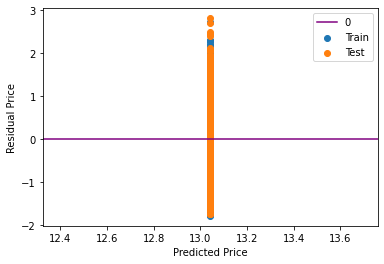

QQ Plot of residuals:


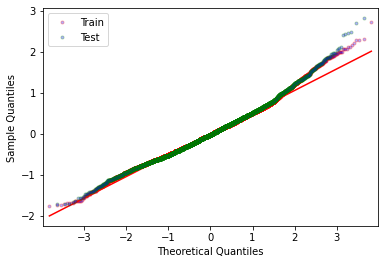

In [335]:
evaluate(y_train, y_test, baseline_train_pred, baseline_test_pred)

### Shit model

In [379]:
def smols(X,y,cols=cols):
    Xcol = X[cols]
    shmod = sm.OLS(endog=y, exog=sm.add_constant(Xcol)).fit()
    return shmod

In [380]:
cols = ['sqft_living_log']
smols(X_train,y_train,cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 1.254e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:12:40   Log-Likelihood:                -6898.4
No. Observations:               14707   AIC:                         1.380e+04
Df Residuals:                   14705   BIC:                         1.382e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7202      0.057    118.840      0.000       6.609       6.831
sqft_living_log     0.8377      0.007    111.993      0.000       0.823       0.852
==============================================================================
Omnibus:                       70.741   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.467
Skew:                           0.140   Prob(JB):                     2.24e-15
Kurtosis:                       2.823   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [278]:
def linpreds(X_tr_scaled, y_tr, X_te_scaled):
    '''
    Uses Linear Regression to generate output predictions given training and test inputs.
    Arguments:
    X_tr_scaled - dataframe
        Input variables and values for the training set
    y_tr - array-like
        Actual values for output variable, for the training set
    X_te_scaled - dataframe
        Input variables and values for the test set
    Returns:
    Output (y) prediction arrays:
        train, test
    '''
    lr = LinearRegression()
    lr.fit(X_tr_scaled, y_tr)
    return lr.predict(X_tr_scaled), lr.predict(X_te_scaled)

In [325]:
X_train_scaled.columns

Index(['id', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'floors', 'bedrooms', 'bathrooms', 'sqft_living_log', 'sqft_lot_log',
       'sqft_above_log'],
      dtype='object')

In [381]:
smols(X_train_scaled,y_train,\
      cols=['sqft_living_log','bathrooms','bedrooms','floors']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     3353.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:12:49   Log-Likelihood:                -6667.2
No. Observations:               14707   AIC:                         1.334e+04
Df Residuals:                   14702   BIC:                         1.338e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.0431      0.003   4153.610      0.000      13.037      13.049
sqft_living_log     0.3640      0.005     67.690      0.000       0.353       0.375
bathrooms           0.0412      0.005      7.807      0.000       0.031       0.052
bedrooms           -0.0730      0.004    -17.688      0.000      -0.081      -0.065
floors              0.0226      0.004      6.149      0.000       0.015       0.030
==============================================================================
Omnibus:                       80.027   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.311
Skew:                           0.161   Prob(JB):                     9.89e-18
Kurtosis:                       2.844   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [330]:
X_tr1, X_te1 = X_train_scaled[['sqft_living_log']], X_test_scaled[['sqft_living_log']]
X_tr2, X_te2 = X_train_scaled[['sqft_living_log','bathrooms']],\
               X_test_scaled[['sqft_living_log','bathrooms']]
X_tr3, X_te3 = X_train_scaled[['sqft_living_log','bathrooms','bedrooms']],\
               X_test_scaled[['sqft_living_log','bathrooms','bedrooms']]
X_tr4, X_te4 = X_train_scaled[['sqft_living_log','bathrooms','bedrooms','floors']],\
               X_test_scaled[['sqft_living_log','bathrooms','bedrooms','floors']]

trp1, tep1 = linpreds(X_tr1, y_train, X_te1)
trp2, tep2 = linpreds(X_tr2, y_train, X_te2)
trp3, tep3 = linpreds(X_tr3, y_train, X_te3)
trp4, tep4 = linpreds(X_tr4, y_train, X_te4)

Train R2 score: 0.47702097983371905 
Test R2 score: 0.46472544278112704 
<><><><><>
Train RMSE (ln): 0.38075273197989373 
Test RMSE (ln): 0.3909505770228889 
<><><><><>
Train MAE (ln): 0.3068610105673487 
Test MAE (ln): 0.31617548051113414 

Scatter of residuals:


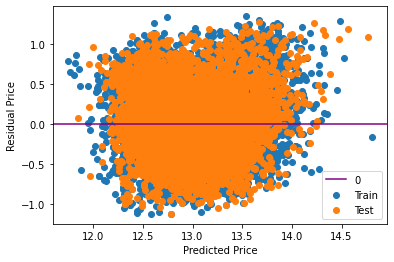

QQ Plot of residuals:


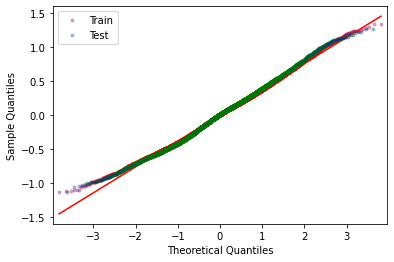

In [336]:
evaluate(y_train, y_test, trp4, tep4)

Train R2 score: 0.47567595907701044 
Test R2 score: 0.4628556289216833 
<><><><><>
Train RMSE (ln): 0.3812420360028282 
Test RMSE (ln): 0.39163281338735084 
<><><><><>
Train MAE (ln): 0.3075935614877718 
Test MAE (ln): 0.3169266559842537 

Scatter of residuals:


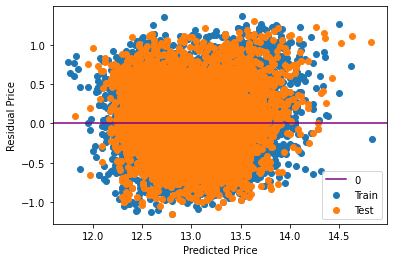

QQ Plot of residuals:


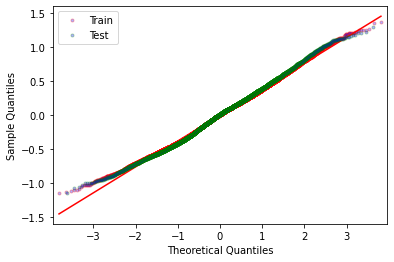

In [337]:
evaluate(y_train, y_test, trp3, tep3)

Train R2 score: 0.46348424860155746 
Test R2 score: 0.4510117933104454 
<><><><><>
Train RMSE (ln): 0.38564893205780526 
Test RMSE (ln): 0.39592695108394865 
<><><><><>
Train MAE (ln): 0.31181001444287915 
Test MAE (ln): 0.32110274875442446 

Scatter of residuals:


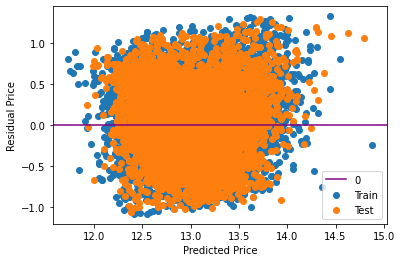

QQ Plot of residuals:


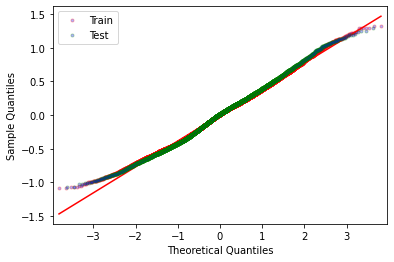

In [338]:
evaluate(y_train, y_test, trp2, tep2)

Train R2 score: 0.4603155408496137 
Test R2 score: 0.44754644120510567 
<><><><><>
Train RMSE (ln): 0.3867860932166727 
Test RMSE (ln): 0.397174580759214 
<><><><><>
Train MAE (ln): 0.31273062328235923 
Test MAE (ln): 0.3223121497949124 

Scatter of residuals:


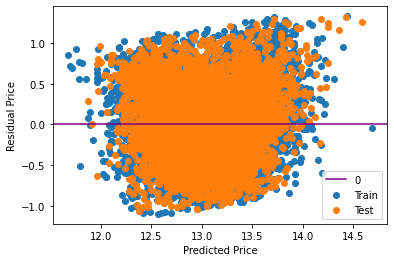

QQ Plot of residuals:


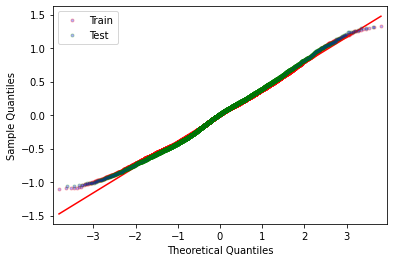

In [339]:
evaluate(y_train, y_test, trp1, tep1)

### Polynomial Features
As seen above, we get only modest improvements in R2 and error calculations, but let's see if we can improve this with interaction terms.

In [426]:
datantot.columns

Index(['id', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'floors', 'bedrooms', 'bathrooms', 'price_log', 'sqft_living_log',
       'sqft_lot_log', 'sqft_above_log'],
      dtype='object')

In [427]:
Xpf = datantot.drop(columns=['price_log','price','id','sqft_basement','sqft_living', 'sqft_lot', 'sqft_above'])

pf = PolynomialFeatures(degree=2)
pf.fit(Xpf)
Xpdf = pd.DataFrame(pf.transform(Xpf),\
                   columns=pf.get_feature_names(input_features=Xpf.columns))

Xpf_train, Xpf_test, ypf_train, ypf_test = \
train_test_split(Xpdf, datantot['price_log'], test_size=0.33, random_state=42)

In [428]:
pfscaler = StandardScaler()
pfscaler.fit(Xpf_train)
Xpf_train_scaled = pfscaler.transform(Xpf_train)
Xpf_test_scaled = pfscaler.transform(Xpf_test)
Xpf_train_scaled = pd.DataFrame(Xpf_train_scaled, columns=Xpf_train.columns, index=Xpf_train.index)
Xpf_test_scaled = pd.DataFrame(Xpf_test_scaled, columns=Xpf_test.columns, index=Xpf_test.index)

In [429]:
pftrp1, pftep1 = linpreds(Xpf_train_scaled, ypf_train, Xpf_test_scaled)

Train R2 score: 0.5269281879835706 
Test R2 score: 0.5204589733184026 
<><><><><>
Train RMSE (ln): 0.362129938041803 
Test RMSE (ln): 0.3700381000261925 
<><><><><>
Train MAE (ln): 0.29063037532052693 
Test MAE (ln): 0.2983708716711152 

Scatter of residuals:


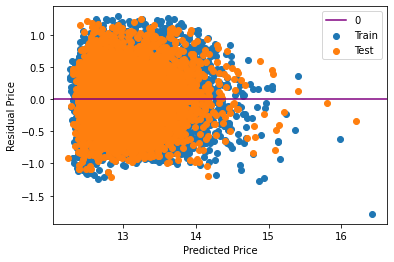

QQ Plot of residuals:


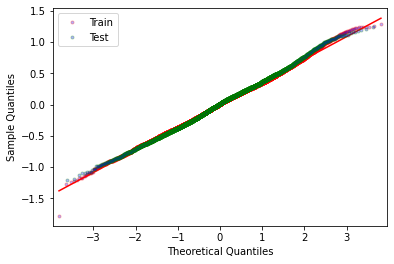

In [430]:
evaluate(ypf_train, ypf_test, pftrp1, pftep1)

In [431]:
Xpf_train_scaled.columns

Index(['1', 'floors', 'bedrooms', 'bathrooms', 'sqft_living_log',
       'sqft_lot_log', 'sqft_above_log', 'floors^2', 'floors bedrooms',
       'floors bathrooms', 'floors sqft_living_log', 'floors sqft_lot_log',
       'floors sqft_above_log', 'bedrooms^2', 'bedrooms bathrooms',
       'bedrooms sqft_living_log', 'bedrooms sqft_lot_log',
       'bedrooms sqft_above_log', 'bathrooms^2', 'bathrooms sqft_living_log',
       'bathrooms sqft_lot_log', 'bathrooms sqft_above_log',
       'sqft_living_log^2', 'sqft_living_log sqft_lot_log',
       'sqft_living_log sqft_above_log', 'sqft_lot_log^2',
       'sqft_lot_log sqft_above_log', 'sqft_above_log^2'],
      dtype='object')

In [432]:
smXpf = Xpf_train_scaled.drop(columns='1')
pfsm = smols(smXpf, ypf_train, cols=smXpf.columns)
pfsm_df = pfsm.params.reset_index()
pfsm_df = pfsm_df.merge(pfsm.pvalues.reset_index(), on='index')
pfsm_df = pfsm_df.set_index('index')
pfsm_df.columns = ['coef','p_value']

In [433]:
pfsm_df.sort_values('coef', ascending=False)

,coef,p_value
index,,
const,13.043090,0.000000e+00
sqft_living_log sqft_above_log,7.637712,5.334086e-11
sqft_lot_log sqft_above_log,1.138315,1.555462e-07
floors sqft_living_log,0.858758,9.047058e-04
bathrooms sqft_living_log,0.555607,3.679840e-02
sqft_lot_log^2,0.442355,3.986904e-19
floors^2,0.230563,3.543237e-15
floors bedrooms,0.153088,4.508907e-07
floors sqft_lot_log,0.153000,7.175723e-03


In [434]:
pfsm_df.sort_values('p_value', ascending=False)

,coef,p_value
index,,
floors,-0.023440,8.583796e-01
bedrooms,0.044169,6.867998e-01
bathrooms sqft_above_log,0.132722,5.817123e-01
bedrooms sqft_living_log,-0.129546,5.057443e-01
bathrooms sqft_lot_log,0.048093,4.692552e-01
bedrooms sqft_above_log,-0.212623,2.263687e-01
bedrooms sqft_lot_log,0.083754,1.237300e-01
bathrooms^2,0.049969,1.018852e-01
bathrooms sqft_living_log,0.555607,3.679840e-02


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here to prepare your data

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [ ]:
# code here for your first 'substandard' model

In [ ]:
# code here to evaluate your first 'substandard' model

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
